<a href="https://colab.research.google.com/github/rammya29/Goeduhub-STP/blob/main/Assignment_Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment / Task - 11

##Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

[Dataset](https://www.kaggle.com/ajaymanwani/loan-approval-prediction)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv('/content/task11.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [ ]:
data= df['Property_Area'].values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Property_Area=le.fit_transform(df.Property_Area)
df.Property_Area.head(20)

0     2
1     0
2     2
3     2
4     2
5     2
6     2
7     1
8     2
9     1
10    2
11    2
12    2
13    0
14    2
15    2
16    2
17    2
18    0
19    2
Name: Property_Area, dtype: int64

In [ ]:
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Loan_Status.head(20)

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    0
19    1
Name: Loan_Status, dtype: int64

In [ ]:
newdf=df.replace(np.NAN,{'LoanAmount':100,'Loan_Amount_Term':360.0,'Credit_History':1.0})
newdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,100.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
newdf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

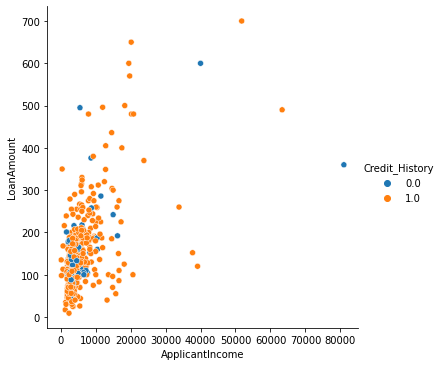

In [ ]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue="Credit_History",data=newdf)

In [ ]:
x=newdf.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status'],axis='columns')
print(x)

     ApplicantIncome  CoapplicantIncome  ...  Credit_History  Property_Area
0               5849                0.0  ...             1.0              2
1               4583             1508.0  ...             1.0              0
2               3000                0.0  ...             1.0              2
3               2583             2358.0  ...             1.0              2
4               6000                0.0  ...             1.0              2
..               ...                ...  ...             ...            ...
609             2900                0.0  ...             1.0              0
610             4106                0.0  ...             1.0              0
611             8072              240.0  ...             1.0              2
612             7583                0.0  ...             1.0              2
613             4583                0.0  ...             0.0              1

[614 rows x 6 columns]


In [ ]:
y=newdf['Loan_Status']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

print(len(x_train))
print(len(x_test))

429
185


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(random_state=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy is",Accuracy*100,'%')

Accuracy is 72.97297297297297 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[ 35,  26],
       [ 24, 100]])

[Text(129.24264705882354, 211.7178947368421, 'X[4] <= 0.5\ngini = 0.424\nsamples = 429\nvalue = [131, 298]'),
 Text(19.694117647058825, 200.2736842105263, 'X[2] <= 547.5\ngini = 0.146\nsamples = 63\nvalue = [58, 5]'),
 Text(15.75529411764706, 188.82947368421054, 'X[1] <= 6981.5\ngini = 0.121\nsamples = 62\nvalue = [58, 4]'),
 Text(7.87764705882353, 177.38526315789474, 'X[2] <= 129.0\ngini = 0.095\nsamples = 60\nvalue = [57, 3]'),
 Text(3.938823529411765, 165.94105263157894, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(11.816470588235294, 165.94105263157894, 'X[2] <= 131.5\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(7.87764705882353, 154.49684210526317, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.75529411764706, 154.49684210526317, 'X[2] <= 163.0\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(11.816470588235294, 143.05263157894737, 'X[2] <= 159.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(7.87764705882353, 131.60842105263157, 'gini = 0.0\nsample

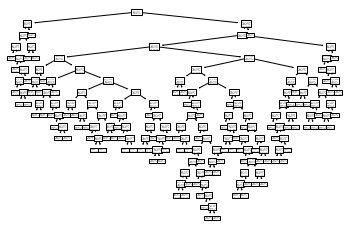

In [ ]:
from sklearn import tree

tree.plot_tree(clf)

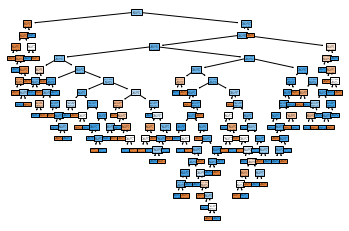

In [ ]:
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('tree.jpg',format='jpg',bbox_inches = "tight")

##END OF ASSIGNMENT

**Author** : Rammya Dharshini K

**Dates** : 14-06-2021

**Reg.ID** : GO_STP_1613